# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ You are strongly advised to:
* 💾 download the solution for yesterday's optional `distance_seller_customer` function if you didn't have time to code it
* 👥 copy-paste it into your `olist/orders.py` file



👇 First things first, import the `orders` dataset

In [15]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037


Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix down below 👇, we can notice that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other features constant**.

<AxesSubplot:>

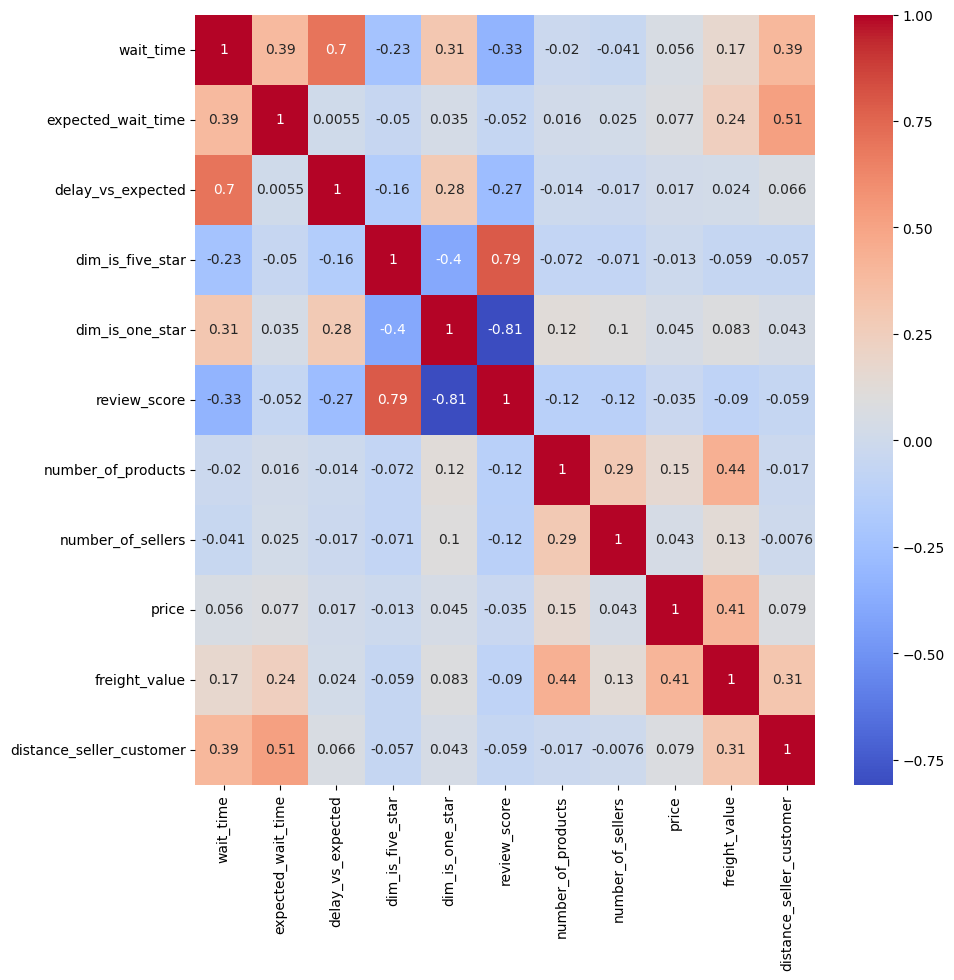

In [4]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric `R-squared`, as well as `individual regression coefficients`, `t-values`, `p-values`, and `95% confidence intervals`

***Model 1***:

In [78]:
import statsmodels.api as sm

In [80]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula = 'wait_time ~ review_score', data=orders).fit()
model1.rsquared

0.11157977934830987

In [82]:
print(model1.params)

Intercept       22.725918
review_score    -2.457575
dtype: float64


In [83]:
model1.rsquared

0.11157977934830987

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wait_time   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:08:43   Log-Likelihood:            -3.4574e+05
No. Observations:               95872   AIC:                         6.915e+05
Df Residuals:                   95870   BIC:                         6.915e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.7259      0.097    233.282      0.000      22.535      22.917
review_score    -2.4576      0.022   -109.730      0.000      -2.501      -2.414
==============================================================================
Omnibus:                    81532.766   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7575459.067
Skew:                           3.608   Prob(JB):                         0.00
Kurtosis:                      45.946   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [84]:
Y = orders['delay_vs_expected']
X = orders['review_score']
model2 = sm.OLS(Y, X).fit() # Finds the best beta
model2.predict(X).head() # The Y_pred (regression-line)

0    0.317244
1    0.317244
2    0.396556
3    0.396556
4    0.396556
dtype: float64

In [ ]:
# model2 = smf.ols(formula = 'delay_vs_expected ~ review_score', data=orders).fit()

In [85]:
print(model2.params)

review_score    0.079311
dtype: float64


In [86]:
model2.rsquared

0.00534901898551321

In [87]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      delay_vs_expected   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              515.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                   7.61e-114
Time:                        14:52:00   Log-Likelihood:                     -2.8452e+05
No. Observations:               95880   AIC:                                  5.690e+05
Df Residuals:                   95879   BIC:                                  5.690e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
review_score     0.0793      0.003     22.707      0.000       0.072       0.086
==============================================================================
Omnibus:                   186556.602   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        584031700.769
Skew:                          15.403   Prob(JB):                         0.00
Kurtosis:                     384.106   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

***Model 3***:

In [88]:
# run OLS model
model3 = smf.ols(formula='review_score ~ wait_time + delay_vs_expected', data=orders).fit()
model3.rsquared

0.1143819369084148

In [89]:
model3.params

Intercept            4.650219
wait_time           -0.038298
delay_vs_expected   -0.020530
dtype: float64

In [90]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:52:08   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.008    601.568      0.000       4.635       4.665
wait_time            -0.0383      0.001    -65.969      0.000      -0.039      -0.037
delay_vs_expected    -0.0205      0.001    -17.417      0.000      -0.023      -0.018
==============================================================================
Omnibus:                    19995.754   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40513.333
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.976   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
👉 Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **`partial correlation coefficients`**. 

❓Can you notice the difference with the **simple regression** coefficients computed with *seaborn* above? 

❓What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


> YOUR ANSWER HERE

<details>
    <summary>- 💡 Solution 💡-</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. 

✅ Let's try to add more features to our regression to improve the explainability of the linear regression.

👉 Create a new OLS `model4` with more features from the `orders` dataset.
- ⚠️ Do not create **data leaks**: do not add features that are directly derived from the `review_score`
- ⚠️ Do not add two features perfectly collinear with each other
- ⚖️  Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ won't be in the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

📝 <u>Note</u>: a **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because in this model, we want to minimise the **`MSE Mean Squared Errors`**

***Model 4***:

❓ What features would you like to consider ?

In [92]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.385628,0.702597,-0.234101,0.305577,-0.334036,-0.019754,-0.040702,0.055638,0.167284,0.394984
expected_wait_time,0.385628,1.000000,0.005519,-0.050315,0.034815,-0.052499,0.015735,0.024883,0.076611,0.238750,0.513579
delay_vs_expected,0.702597,0.005519,1.000000,-0.156738,0.284689,-0.272351,-0.013649,-0.017160,0.016631,0.023891,0.066073
dim_is_five_star,-0.234101,-0.050315,-0.156738,1.000000,-0.396378,0.791756,-0.072281,-0.070539,-0.012752,-0.058778,-0.056574
dim_is_one_star,0.305577,0.034815,0.284689,-0.396378,1.000000,-0.807772,0.119839,0.102235,0.044650,0.082759,0.043158
review_score,-0.334036,-0.052499,-0.272351,0.791756,-0.807772,1.000000,-0.123340,-0.117014,-0.034527,-0.090005,-0.059142
number_of_products,-0.019754,0.015735,-0.013649,-0.072281,0.119839,-0.123340,1.000000,0.288735,0.153547,0.438059,-0.017294
number_of_sellers,-0.040702,0.024883,-0.017160,-0.070539,0.102235,-0.117014,0.288735,1.000000,0.042984,0.133582,-0.007639
price,0.055638,0.076611,0.016631,-0.012752,0.044650,-0.034527,0.153547,0.042984,1.000000,0.410127,0.079342
freight_value,0.167284,0.238750,0.023891,-0.058778,0.082759,-0.090005,0.438059,0.133582,0.410127,1.000000,0.314195


⚖️ Standardize your features.

*Do you remember why we need to perform this operation before running a `Multivariate regression` ?*

<details>
    <summary>- 💡 Answer 💡-</summary>

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others 
    
    *Ex: if you have a feature "number of bedrooms" from 1 to 5 and a feature "surface" from 20 to 200 sqm, the ranges of these two features are quite different...*

📅 When we will discover Machine Learning Algorithms, we will also need to perform some scaling operations before trying to predict any target.

In [93]:
orders_2 = orders.copy()

mean = orders_2["freight_value"].mean()
st_dev = orders_2["freight_value"].std()

x = orders_2["freight_value"].apply(lambda rows: (rows - mean) / st_dev)
x.head()

0   -0.652036
1    0.000493
2   -0.164034
3    0.206848
4   -0.652036
Name: freight_value, dtype: float64

👉 Create your `model4` and train it.

In [100]:
# Y = orders_2["price"]
# X = orders_2["freight_value"]
# model4 = sm.OLS(Y, X).fit()
# model4.predict(X).head()

In [99]:
model4 = smf.ols(formula = 'price ~ freight_value', data = orders_2).fit()

In [94]:
model4.rsquared

0.16820427346196787

In [101]:
model4.params

Intercept        46.644120
freight_value     3.958363
dtype: float64

In [102]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                 1.939e+04
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:53:15   Log-Likelihood:            -6.3883e+05
No. Observations:               95880   AIC:                         1.278e+06
Df Residuals:                   95878   BIC:                         1.278e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        46.6441      0.890     52.400      0.000      44.899      48.389
freight_value     3.9584      0.028    139.242      0.000       3.903       4.014
==============================================================================
Omnibus:                   150035.754   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        393235500.535
Skew:                           9.418   Prob(JB):                         0.00
Kurtosis:                     316.173   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [ ]:
# YOUR CODE HERE

<details>
    <summary>- 💡Explanations 💡 -</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explainability of `review_score` lies outside of the orders dataset.

⚠️ Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

⚠️ Regression performance should not be measured only by its R-squared!  

👀 Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals.

You should see that the mean of the residuals is equal to 0 (always verified in a linear regression context)

In [103]:
predicted_freight_value = model4.predict(orders_2["freight_value"])
predicted_freight_value.head()

0     81.161043
1    136.736457
2    122.723853
3    154.311588
4     81.161043
dtype: float64

🧮 Compute the associated RMSE.

In [ ]:
# from statsmodels.tools.eval_measures import rmse

# rmse = rmse(orders['delay_vs_expected'], model1.predict(X))
# rmse

📊 Plot the `residuals` in a histogram.

/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


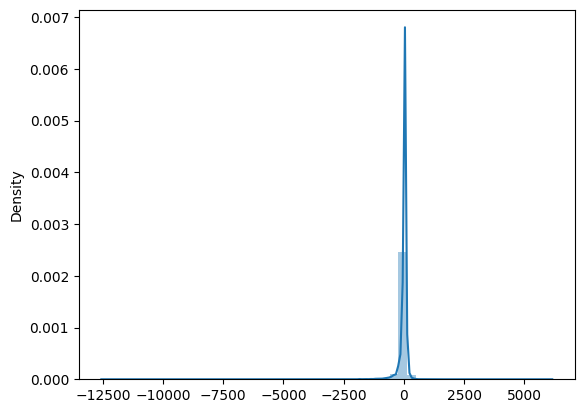

In [104]:
residuals = predicted_freight_value - orders_2["price"]
sns.distplot(residuals, kde=True);

In [105]:
round(residuals.mean())

0

❓ Can you guess why the residual distplot has such a strange shape? 

*Hint:*<br/>
👉 Plot, on the same graph, both the distribution of the `review_score` and the distribution of the `predicted_review_score`.

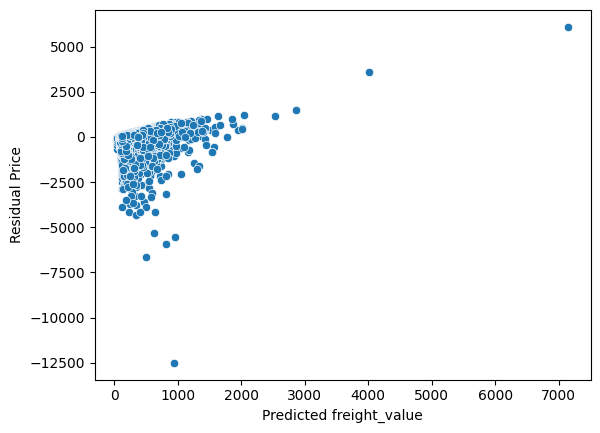

In [73]:
# Check with Residuals vs. Fitted scatterplot
sns.scatterplot(x=predicted_freight_value, y=residuals)
plt.xlabel('Predicted freight_value')
plt.ylabel('Residual Price');

📈 Actually, using `seaborn`, we could have already plotted a `regression line` of the `review_score` vs. the `delay_vs_expected`

Do it once with a sub-`sample` of the population, and once with the `entire population`.

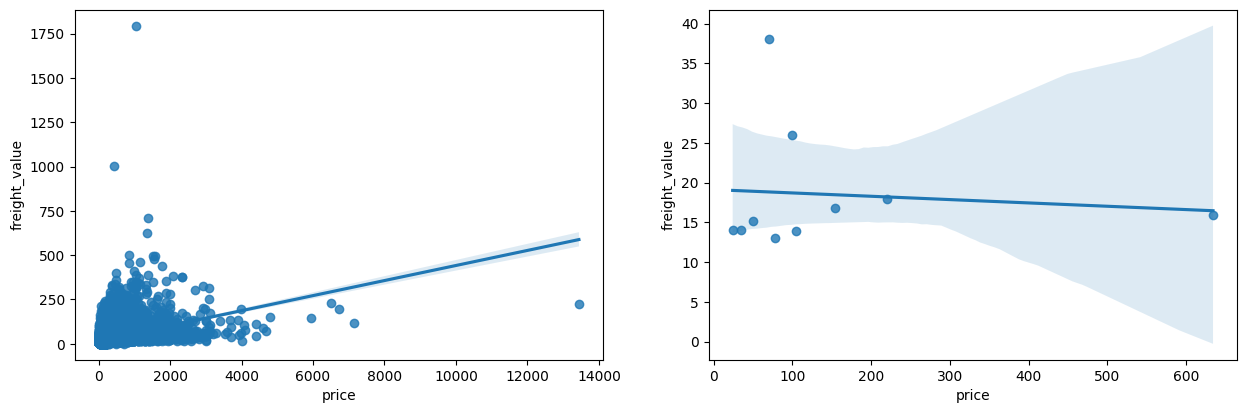

In [74]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='price', y='freight_value', data=orders_2, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='price', y='freight_value', data=orders_2.sample(10, random_state=6), ci=95);

☝️ You can see that it is hard to regress the `review_score` of an order vs. its `wait_time`. because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

📅 In the next session, you will discover a new model: the `Logistic Regression` which, despite its name, is a `Classification Algorithm` 

☝️ So in the end, our model is not so great, for two reasons:
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

💡 So instead on working on individual orders and trying to explain their discrete `review_score` based on the `wait_time`, we will focus our analysis on the sellers' level, aggregating the orders by sellers in the next challenge.

🏁 Great job! 

💾 Don't forget to *save*, *commit* and *push* this notebook when you are done!